       CREDIT_SCORE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS         DUIS  \
count  10000.000000    10000.000000          10000.00000  10000.00000   
mean       0.516790    11730.100000              1.46710      0.23650   
std        0.130015     2669.900153              2.23379      0.55299   
min        0.053358     2000.000000              0.00000      0.00000   
25%        0.432593    10000.000000              0.00000      0.00000   
50%        0.524905    12000.000000              0.00000      0.00000   
75%        0.606510    13000.000000              2.00000      0.00000   
max        0.960819    22000.000000             22.00000      6.00000   

       PAST_ACCIDENTS       OUTCOME  
count    10000.000000  10000.000000  
mean         1.046800      0.310500  
std          1.648782      0.462721  
min          0.000000      0.000000  
25%          0.000000      0.000000  
50%          0.000000      0.000000  
75%          2.000000      1.000000  
max         15.000000      1.000000  


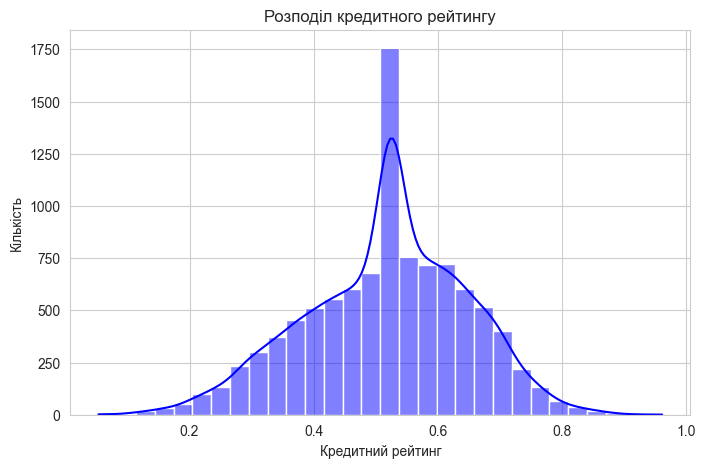

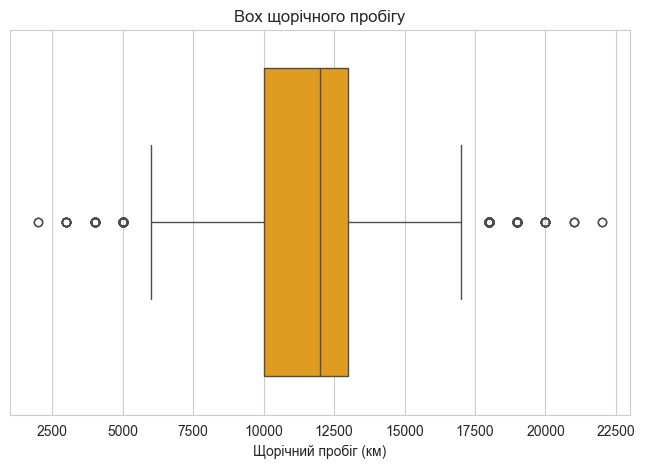

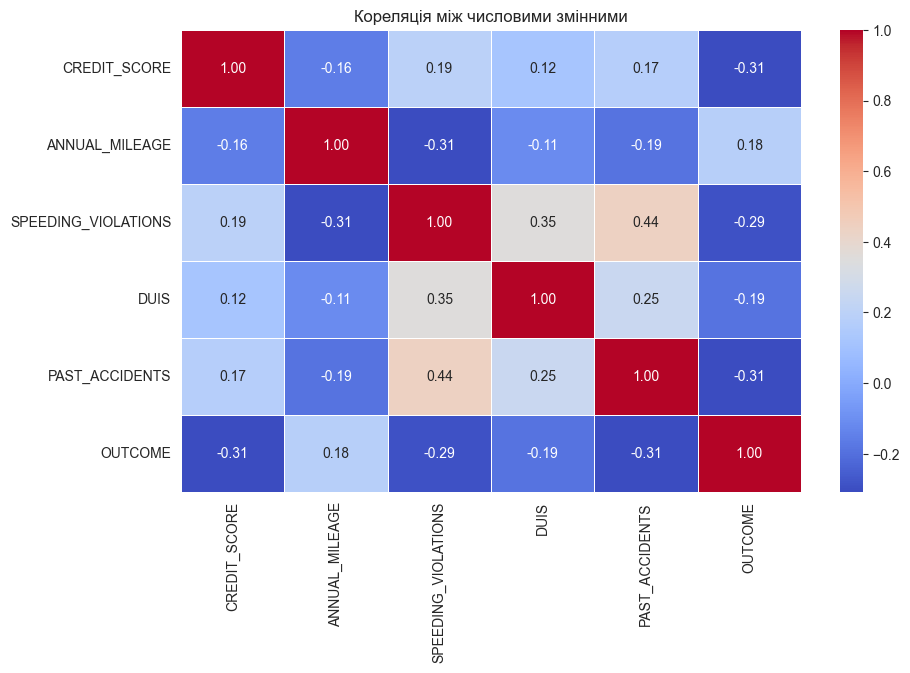

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class AnalizProg:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = pd.read_csv(file_path)
        self.clean_data()

    def clean_data(self):
        self.df = self.df.drop(columns=["Unnamed: 0", "ID"], errors="ignore")

        self.num_columns = ["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS", "OUTCOME"]
        self.df[self.num_columns] = self.df[self.num_columns].apply(pd.to_numeric, errors="coerce")
        self.df[self.num_columns] = self.df[self.num_columns].fillna(self.df[self.num_columns].median())

        self.cat_columns = ["AGE", "GENDER", "RACE", "DRIVING_EXPERIENCE", "EDUCATION",
                            "VEHICLE_OWNERSHIP", "VEHICLE_YEAR", "MARRIED", "CHILDREN",
                            "POSTAL_CODE", "VEHICLE_TYPE"]
        for col in self.cat_columns:
            self.df[col] = self.df[col].fillna(self.df[col].mode()[0])

    def red_dt(self):

        return self.df.describe()

    def vis(self):
        sns.set_style("whitegrid")

        plt.figure(figsize=(8, 5))
        sns.histplot(self.df["CREDIT_SCORE"], bins=30, kde=True, color="blue")
        plt.title("Розподіл кредитного рейтингу")
        plt.xlabel("Кредитний рейтинг")
        plt.ylabel("Кількість")
        plt.show()

        plt.figure(figsize=(8, 5))
        sns.boxplot(x=self.df["ANNUAL_MILEAGE"], color="orange")
        plt.title("Box щорічного пробігу")
        plt.xlabel("Щорічний пробіг (км)")
        plt.show()

        plt.figure(figsize=(10, 6))
        corr_matrix = self.df[self.num_columns].corr()
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Кореляція між числовими змінними")
        plt.show()

analiz = AnalizProg("Car_Insurance_Claim.csv")
result = analiz.red_dt()
print(result)
print("Висновки:")
print("Вплив інших факторів:")
print("- Більшість клієнтів без позову мають високий кредитний рейтинг.")
print("- Досвідчені водії та ті, хто не має штрафів за перевищення швидкості, рідше подають позови.")
print("- Власники новіших авто (2020+) частіше мають безпечну історію водіння.")

print(" Рекомендації для страхової компанії:")
print("- Враховувати кредитний рейтинг при визначенні політики страхування.")
print("- Впровадити знижки для клієнтів із хорошою історією водіння.")
print("- Аналізувати річний пробіг авто при розрахунку ризиків.")

analiz.vis()
